In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_num=10000

def make_ardata(coef,data_num):
    init_data=0
    data=np.zeros(data_num)
    burn_in=1000
    for i in range(data_num+burn_in):
        if i<burn_in:
            init_data=coef*init_data+np.random.randn(1)
        elif i==burn_in:
            data[i-burn_in]=init_data
        else:
            data[i-burn_in]=coef*data[i-burn_in-1]+np.random.randn(1)
    return data

data=np.vstack((make_ardata(0.6,data_num),make_ardata(-0.6,data_num)))
print(data.shape)

theta=np.radians(60)
rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])
val_data=np.dot(rot_matrix,data)

(2, 10000)


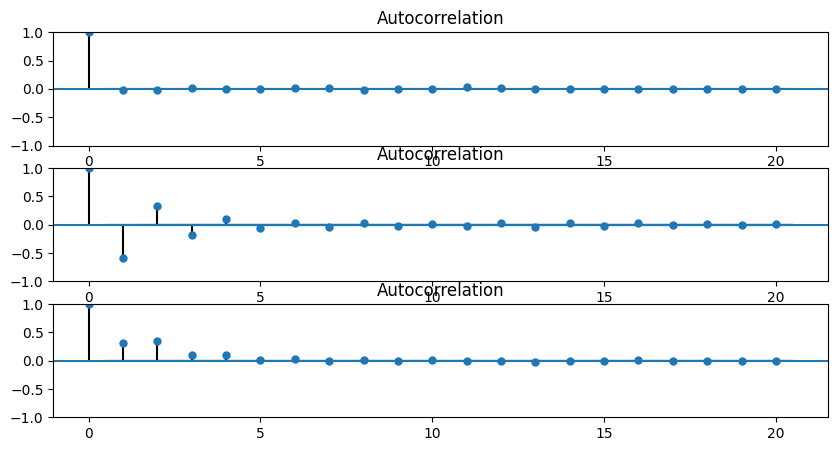

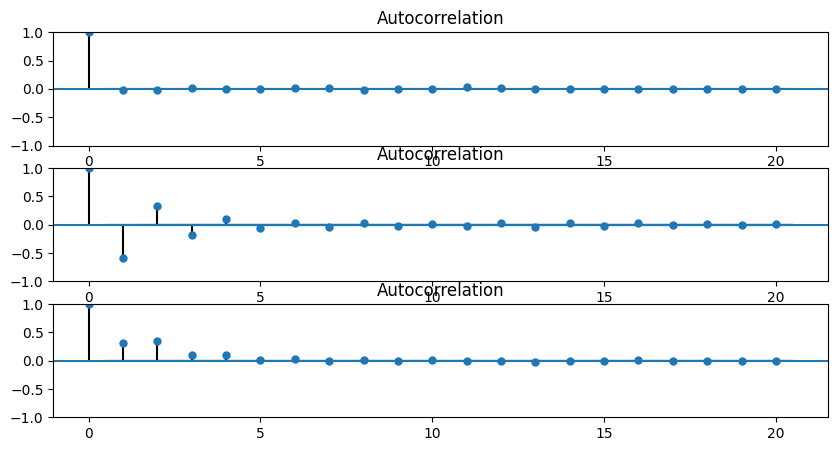

In [12]:
import statsmodels.graphics.tsaplots as tsap

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(3,1,1)
tsap.plot_acf(np.random.randn(10000),lags=20,ax=ax1)

ax2=fig.add_subplot(3,1,2)
tsap.plot_acf(data[1],lags=20,ax=ax2)

ax3=fig.add_subplot(3,1,3)
tsap.plot_acf(val_data[1],lags=20,ax=ax3)

In [17]:
from sklearn.decomposition import FastICA

transformer = FastICA(n_components=7,random_state=0,whiten='unit-variance')
ica_data= transformer.fit_transform(val_data.T).T

df=pd.DataFrame(data={'original:0':data[0],'original:1':data[1],'ica_data:0':ica_data[0],'ica_data:1':ica_data[1]})
print(df.corr())

            original:0  original:1    ica_data:0    ica_data:1
original:0    1.000000   -0.002445 -1.405563e-01  9.900727e-01
original:1   -0.002445    1.000000  9.904134e-01  1.381352e-01
ica_data:0   -0.140556    0.990413  1.000000e+00 -2.047922e-16
ica_data:1    0.990073    0.138135 -2.047922e-16  1.000000e+00


/home/lab/masahiro/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:470: UserWarning: n_components is too large: it will be set to 2
  % n_components
